# British airways review 

In [81]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
plt.style.use("ggplot")
sns.set(style="whitegrid")

In [82]:
df = pd.read_csv(r"C:\Users\juani\OneDrive\Desktop\PYTHON\myexercises\data\British_airways_review\British_Airway_Review.csv")

In [83]:
df.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,✅ Trip Verified | London Heathrow to Mumbai in...,31st July 2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"✅ Trip Verified | Keflavík, Iceland to London ...",31st July 2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,✅ Trip Verified | Terrible Experience with Bri...,29th July 2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


In [84]:
num_rows, num_columns = df.shape

null_values = df.isnull().sum().sum()

duplicates_n = df[df.duplicated()].shape[0]
# Diagnostics results
data_checking = """
- The data has {0} rows and {1} columns
- There are {2} null/na values and {3} duplicated rows. 
""" 
print(data_checking.format(num_rows, num_columns,
                        null_values, duplicates_n))



- The data has 2500 rows and 8 columns
- There are 0 null/na values and 0 duplicated rows. 



In [85]:
for col in df.columns[2:]:
    print(col)
    columns_cats_count = df[col].value_counts(sort=True)
    num_cats = len(columns_cats_count.keys())
    frequency = dict(columns_cats_count)
    if num_cats <= 10:
        print(num_cats)
        print(frequency)
    else:
        print(num_cats)

country
67
seat_type
4
{'Economy Class': 1363, 'Business Class': 754, 'Premium Economy': 248, 'First Class': 135}
recommended
2
{'no': 1620, 'yes': 880}
stars
5
{3: 1137, 5: 682, 1: 227, 9: 227, 7: 227}
route
10
{'Heathrow to Las Vegas': 250, 'Rome to Heathrow': 250, 'Gatwick to Venice': 250, 'London to Luanda': 250, 'Denver to Heathrow': 250, 'BKK to LHR': 250, 'London to Tampa': 250, 'London to Sydney': 250, 'LHR to CPT': 250, 'BLR to LHR': 250}
type_of_traveller
4
{'Couple Leisure': 1000, 'Family Leisure': 500, 'Solo Leisure': 500, 'Business': 500}


In [86]:
profile_columns = ['country', 'seat_type', 'type_of_traveller']
profile_statistic = df[profile_columns].describe()
print(profile_statistic)

               country      seat_type type_of_traveller
count             2500           2500              2500
unique              67              4                 4
top     United Kingdom  Economy Class    Couple Leisure
freq              1552           1363              1000


#  Top 5 countries with most flights

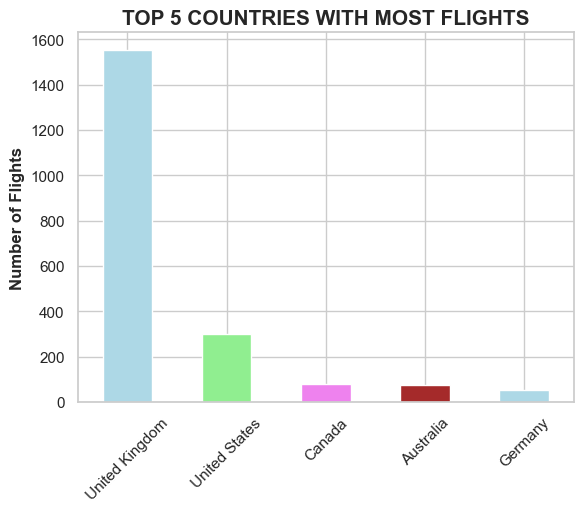

United Kingdom    1552
United States      300
Canada              80
Australia           75
Germany             53
Name: country, dtype: int64


In [87]:
country_flights = df["country"].value_counts(normalize=False, sort=True)
countries_top5 = country_flights.head(5)
countries_top5.plot(kind="bar", color=["lightblue","lightgreen","violet","brown"], rot=45)
plt.ylabel("Number of Flights", fontweight='bold')
plt.title("TOP 5 COUNTRIES WITH MOST FLIGHTS", fontsize=15, fontweight='bold')
plt.show()
print(countries_top5)

# TOP 3 TYPE OF TRAVELLER PER COUNTRY
  

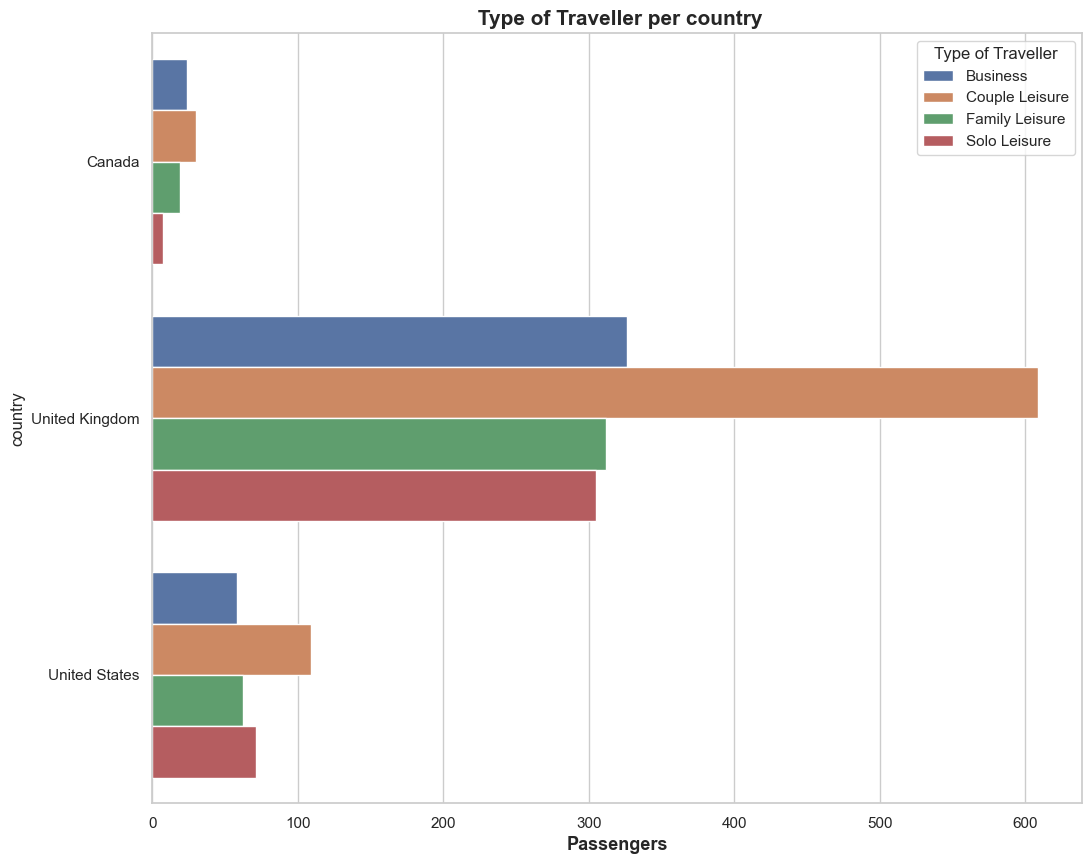

In [88]:
country_flights = df["country"].value_counts()
countries_top10 = country_flights.head(3)
type_travellers_countries = df[df["country"].isin(countries_top10.index)].groupby(["type_of_traveller", "country"]).size().reset_index(name="counts")

plt.figure(figsize=(12, 10))
sns.barplot(data=type_travellers_countries, x="counts", y="country", hue="type_of_traveller")
plt.xlabel("Passengers", fontsize=13, fontweight='bold')
plt.title(" Type of Traveller per country", fontsize=15, fontweight='bold')
plt.legend(title="Type of Traveller")
plt.show()

#   Type of traveller total number 
 

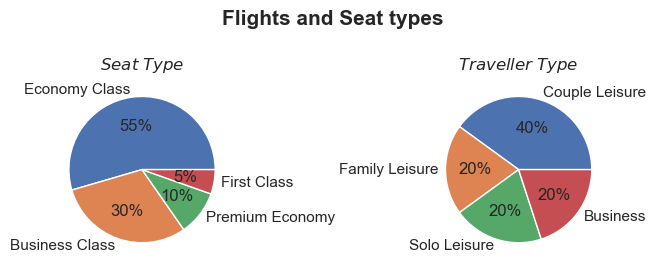

In [89]:
seat_freq = df['seat_type'].value_counts(sort=True)
seat_type = list(seat_freq.index)
seat_counts = list(seat_freq.values)

tipo_freq = df['type_of_traveller'].value_counts(sort=True)
tipos = list(tipo_freq.index)
tipo_counts = list(tipo_freq.values)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Flights and Seat types", y=0.8, fontsize=15, fontweight="bold")
ax1.pie(labels=seat_type, x=seat_counts, autopct='%.0f%%')
ax1.set_title('${Seat}$ ${Type}$', fontweight="bold")
ax2.pie(labels=tipos, x=tipo_counts, autopct='%.0f%%')
ax2.set_title("${Traveller}$ $ {Type}$", fontweight="bold")
fig.tight_layout(pad=.75)
plt.show()

# Who recommend the flights? 

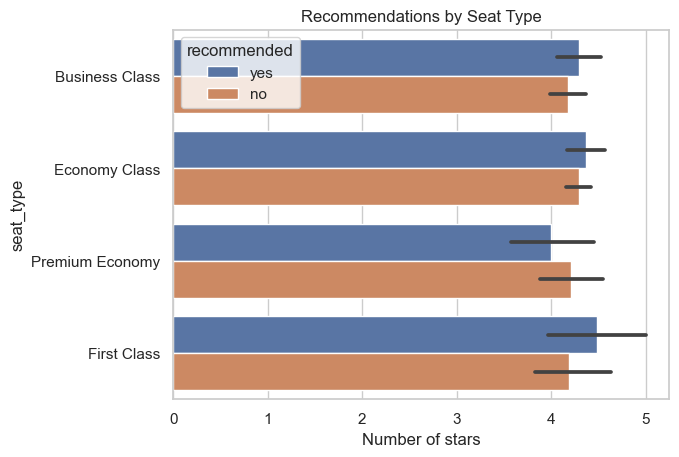

In [90]:
sns.barplot(data = df, x="stars", y="seat_type", hue="recommended")
plt.title("Recommendations by Seat Type")
plt.xlabel("Number of stars")
plt.show()